In [ ]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels as sm
from sklearn.model_selection import train_test_split

from sklearn import linear_model, datasets

url = "https://api.citybik.es/v2/networks"
response = requests.get(url)
data = response.json()
networks = pd.DataFrame(data['networks'])
print(networks['id'].unique())
'''
Importing the API key from the environment variable

The API key is used to access the CityBikes API. It is stored in the environment variables.
'''

['abu-dhabi-careem-bike' 'acces-velo-saguenay' 'aksu' 'alba' 'albabici'
 'algira' 'almatybike' 'alsa-nextbike-leon' 'ambici-badalona'
 'ambici-castelldefels' 'ambici-cornella-de-llobregat'
 'ambici-el-prat-de-llobregat' 'ambici-esplugues-de-llobregat'
 'ambici-gava' 'ambici-molins-de-rei' 'ambici-sant-boi-de-llobregat'
 'ambici-sant-joan-despi' 'ambici-sant-just-desvern'
 'ambici-santa-coloma-de-gramenet' 'ambici-viladecans' 'andria' 'aral'
 'arbike' 'arriva-nitra' 'arval-scandicci' 'ascoli-piceno' 'athens-bikes'
 'austin' 'auxrmlevelo' 'avelo-quebec' 'aventura' 'aviles-en-bici'
 'aw-bike' 'baksi-antalya' 'baksi-cabis' 'baksi-nilesplit' 'batumvelo'
 'bay-wheels' 'bealler' 'belfastbikes-belfast' 'bentonville'
 'bergen-bysykkel' 'bergisches-e-bike' 'beryl-bcp' 'beryl-brighton'
 'beryl-cornwall' 'beryl-greater-manchester' 'beryl-hackney-cargo-bike'
 'beryl-hereford' 'beryl-hertsmere' 'beryl-isle-of-wight' 'beryl-leeds'
 'beryl-norwich' 'beryl-plymouth' 'beryl-portsmouth' 'beryl-southampto

'\nImporting the API key from the environment variable\n\nThe API key is used to access the CityBikes API. It is stored in the environment variables.\n'

In [ ]:
# adding citibikes databse for mobi bikes in Vancouver
'''
accessing the city bikes database for mobibikes
'''
network_id = "mobibikes"
url = f"https://api.citybik.es/v2/networks/{network_id}"
response = requests.get(url)
data = response.json()

# Load station data into DataFrame
stations_df = pd.DataFrame(data['network']['stations'])

# Display relevant information
print(stations_df[['name', 'free_bikes', 'empty_slots', 'latitude', 'longitude']].head())
#add a new column to stations_df. Adding together free_bikes and empty_slots to a new column called total_bikes

stations_df['total_bikes'] = stations_df['free_bikes'] + stations_df['empty_slots']
stations_df

                    name  free_bikes  empty_slots   latitude   longitude
0       Chilco & Barclay           6           12  49.291909 -123.140713
1   St George & Broadway           2           12  49.262321 -123.093060
2  Britannia Parking Lot           3           11  49.275882 -123.071865
3        Morton & Denman          12           14  49.288030 -123.142135
4    Thornton & National           7            7  49.273777 -123.092723


,id,name,latitude,longitude,timestamp,free_bikes,empty_slots,extra,total_bikes
0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,2024-12-17T23:48:34.090497Z,6,12,"{'uid': '0092', 'renting': True, 'returning': ...",18
1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,2024-12-17T23:48:34.230641Z,2,12,"{'uid': '0248', 'renting': True, 'returning': ...",14
2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,2024-12-17T23:48:34.230121Z,3,11,"{'uid': '0232', 'renting': True, 'returning': ...",14
3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,2024-12-17T23:48:34.067909Z,12,14,"{'uid': '0031', 'renting': True, 'returning': ...",26
4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,2024-12-17T23:48:34.230188Z,7,7,"{'uid': '0233', 'renting': True, 'returning': ...",14
...,...,...,...,...,...,...,...,...,...
253,fbb4c06b719596c21f91fd51ef6d4710,7th & Heather,49.265089,-123.119425,2024-12-17T23:48:34.090101Z,4,14,"{'uid': '0081', 'renting': True, 'returning': ...",18
254,fe0c57d04d6e682d284d501446095fc9,Union & Dunlevy,49.277595,-123.095830,2024-12-17T23:48:34.229296Z,9,7,"{'uid': '0212', 'renting': True, 'returning': ...",16
255,fedff7a263c182df94bda7307059cc52,Richards & Helmcken,49.277141,-123.122589,2024-12-17T23:48:34.149577Z,6,10,"{'uid': '0138', 'renting': True, 'returning': ...",16
256,fef69fb400210d861107a61db954d037,Keefer & Abbott,49.279821,-123.108020,2024-12-17T23:48:34.068705Z,20,8,"{'uid': '0053', 'renting': True, 'returning': ...",28


In [15]:
# stations_df.shape # shape of database
stations_df.describe()

,latitude,longitude,free_bikes,empty_slots,total_bikes
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,49.271571,-123.123022,8.054264,10.189922,18.244186
std,0.011641,0.039317,5.135230,5.236691,5.404860
min,49.238105,-123.254307,0.000000,0.000000,0.000000
25%,49.263115,-123.139179,4.000000,7.000000,14.250000
50%,49.270830,-123.118546,7.000000,10.000000,17.000000
75%,49.280403,-123.100094,11.000000,13.750000,20.000000
max,49.302577,-123.056909,29.000000,36.000000,40.000000


In [ ]:
# ### Old code to fetch data from foursquare: not including bike data. 

'''
This code simply pulls data from foursquare without looping it through the coordinates of bike stations - pulls too much information and takes too long., Do not use. 
'''
# '''import os
# import requests
# import pandas as pd  # Import pandas

# # Fetch the API key from environment variables
# api_key = os.environ.get("api_key")
# if not api_key:
#     raise ValueError("API key not found in environment variables.")

# # Base URL for Foursquare Places Search API
# url = "https://api.foursquare.com/v3/places/search"

# # Define the search parameters: location and categories for bars and restaurants
# params = {
#     "query": "bars, restaurants",  # Query for bars and restaurants
#     "near": "Vancouver, Canada",  # Location to search
#     "categories": "13026,13000",  # Category IDs for Bars and Restaurants
#     "limit": 50  # Number of results to return
# }

# # Create headers for the request
# headers = {
#     "Accept": "application/json",
#     "Authorization": api_key  # Authorization header with API key
# }

# # List to hold place data for the DataFrame
# place_data = []

# # Make the GET request
# try:
#     response = requests.get(url, headers=headers, params=params)
#     response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)

#     # Check if the response is empty
#     if not response.text:
#         print("Empty response received.")
#     else:
#         result = response.json()  # Parse the JSON response
#         places = result.get('results', [])

#         if not places:
#             print("No places found.")
#         else:
#             # Collecting place information into the list of dictionaries
#             for place in places:
#                 place_info = {
#                     "Place": place.get('name', 'No name available'),
#                     "Latitude": place.get('geocodes', {}).get('main', {}).get('latitude', 'No latitude'),
#                     "Longitude": place.get('geocodes', {}).get('main', {}).get('longitude', 'No longitude')
#                 }
#                 place_data.append(place_info)

#             # Convert the list of dictionaries to a Pandas DataFrame
#             foursquares_df = pd.DataFrame(place_data)

#             # Show the DataFrame (optional)
#             print(foursquares_df)



# except requests.exceptions.RequestException as e:
#     print(f"An error occurred: {e}")
# '''

                                  Place   Latitude   Longitude
0                  Le Marché St. George  49.245736 -123.094357
1                     Earnest Ice Cream  49.268876 -123.102894
2                Rogue Kitchen & Wetbar  49.263123 -123.117652
3                     Minami Restaurant  49.275269 -123.120797
4                     Cartems Donuterie  49.265642 -123.100591
5                        Creekside Park  49.274585 -123.102893
6            Matchstick Coffee Roasters  49.274404 -123.126239
7                      OEB Breakfast Co  49.273374 -123.119419
8                                 Raisu  49.268036 -123.158378
9               Le Crocodile Restaurant  49.282578 -123.125234
10                                 Nook  49.269521 -123.109276
11                          Cafe Medina  49.280498 -123.116863
12                Hawksworth Restaurant  49.283302 -123.119380
13          CRAFT Beer Market Vancouver  49.270591 -123.106447
14                   Faculty Brewing Co  49.268552 -123

In [ ]:
# import pandas as pd
# import numpy as np

# # Haversine formula to calculate distance
# # def haversine(lat1, lon1, lat2, lon2):
# #     R = 6371  # Radius of the Earth in kilometers
# #     phi1, phi2 = np.radians(lat1), np.radians(lat2)
# #     delta_phi = np.radians(lat2 - lat1)
# #     delta_lambda = np.radians(lon2 - lon1)

# #     a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
# #     c = 2 * np.atan2(np.sqrt(a), np.sqrt(1 - a))
# #     distance = R * c  # Distance in kilometers
# #     return distance * 1000  # Return distance in meters

# # # Dataset 1 (Bike stations)
# #  = pd.DataFrame({
# #     'name': ['Chilco & Barclay', 'St George & Broadway', 'Britannia Parking Lot', 'Morton & Denman', 'Thornton & National'],
# #     'latitude': [49.291909, 49.262321, 49.275882, 49.288030, 49.273777],
# #     'longitude': [-123.140713, -123.093060, -123.071865, -123.142135, -123.092723]
# # })

# # Assuming your actual dataframe is called 'foursquares_df' and looks like this:
# # foursquares_df = pd.DataFrame({
# #     'Place': [...],
# #     'Latitude': [...],
# #     'Longitude': [...]
# # })

# # Function to find the nearest bike station to a restaurant
# def find_nearest_bike_station(restaurant_lat, restaurant_lon, bike_stations):
#     nearest_station_name = None
#     min_distance = float('inf')  # Start with a very large distance
    
#     for _, station in bike_stations.iterrows():
#         distance = haversine(restaurant_lat, restaurant_lon, station['latitude'], station['longitude'])
#         if distance < min_distance:
#             min_distance = distance
#             nearest_station_name = station['name']
    
#     return nearest_station_name, min_distance

# # Add columns for nearest bike station and distance to restaurant dataframe
# foursquares_df['nearest_bike_station'], foursquares_df['distance_to_bike_station'] = zip(*foursquares_df.apply(
#     lambda row: find_nearest_bike_station(row['Latitude'], row['Longitude'], stations_df), axis=1))

# foursquares_df
# # # Filter restaurants that are within 1000 meters of a bike station
# # near_bike_station_restaurants = foursquares_df[foursquares_df['distance_to_bike_station'] <= 1000]

# # # Display the filtered restaurants with nearest bike station
# # print(near_bike_station_restaurants[['Place', 'nearest_bike_station', 'distance_to_bike_station']])



,Place,Latitude,Longitude,nearest_bike_station,distance_to_bike_station
0,Le Marché St. George,49.245736,-123.094357,27th & Main,546.982943
1,Earnest Ice Cream,49.268876,-123.102894,3rd & Quebec,76.033713
2,Rogue Kitchen & Wetbar,49.263123,-123.117652,8th & Ash,121.736680
3,Matchstick Coffee,49.257296,-123.090229,14th & Fraser,87.624161
4,Cartems Donuterie,49.265642,-123.100591,5th & Main,92.562825
5,Nero Belgian Waffle Bar,49.278311,-123.122111,Nelson & Richards,99.437859
6,Creekside Park,49.274585,-123.102893,Science World,110.370358
7,Matchstick Coffee Roasters,49.274404,-123.126239,Pacific & Richards,102.310655
8,Cafe Medina,49.280498,-123.116863,Richards & Robson,64.434830
9,Hawksworth Restaurant,49.283302,-123.119380,šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Ga...,83.325495


YELP Data work

Pulling foursquares data 



In [48]:
# Fetch the API key from environment variables
api_key = os.environ.get("api_key")
if not api_key:
    raise ValueError("API key not found in environment variables.")

# Base URL for Foursquare Places Search API
url = "https://api.foursquare.com/v3/places/search"

# Define the search categories for bars and restaurants
categories = "13026,13000"  # Category IDs for Bars and Restaurants

# Create headers for the request
headers = {
    "Accept": "application/json",
    "Authorization": api_key
}

# Create an empty list to store results
nearby_places = []

# Iterate over each bike station
for index, row in stations_df.iterrows():
    station_name = row['name']
    station_lat = row['latitude']
    station_lon = row['longitude']

    # Set up search parameters for Foursquare
    params = {
        "query": "bars, restaurants",  # Query for bars and restaurants
        "ll": f"{station_lat},{station_lon}",  # Latitude and Longitude of the bike station
        "categories": categories,  # Categories for Bars and Restaurants
        "radius": 1000,  # Search radius in meters
        "limit": 50  # Number of results to return
    }

    try:
        # Make the GET request to the Foursquare API
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()

        # Parse the JSON response
        result = response.json()
        places = result.get('results', [])

        if not places:
            print(f"No places found near {station_name}.")
        else:
            for place in places:
                place_name = place.get('name', 'No name available')
                place_lat = place.get('geocodes', {}).get('main', {}).get('latitude', None)
                place_lon = place.get('geocodes', {}).get('main', {}).get('longitude', None)
                rating = place.get('rating', 'No rating available')  # Fetch rating
                popularity = place.get('popularity', 'No popularity available')  # Fetch popularity
                price = place.get('price', 'No price available')  # Fetch price

                # Add details to the list if latitude and longitude are available
                if place_lat is not None and place_lon is not None:
                    nearby_places.append({
                        "Bike Station": station_name,
                        "Place": place_name,
                        "Place Latitude": place_lat,
                        "Place Longitude": place_lon,
                        "Rating": rating,
                        "Popularity": popularity,
                        "Price": price
                    })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred while searching for places near {station_name}: {e}")

# Convert the results to a DataFrame for further analysis or saving to a file
nearby_places_df = pd.DataFrame(nearby_places)

# Display the results
print(nearby_places_df)


              Bike Station                   Place  Place Latitude  \
0         Chilco & Barclay    Kingyo Izakaya 金魚居酒屋       49.290643   
1         Chilco & Barclay                  Tavola       49.291843   
2         Chilco & Barclay             Peaked Pies       49.289640   
3         Chilco & Barclay         Guu with Garlic       49.290278   
4         Chilco & Barclay  Legendary Noodle House       49.288425   
...                    ...                     ...             ...   
12507  8th & Prince Edward               Starbucks       49.269499   
12508  8th & Prince Edward   Lucy's Eastside Diner       49.260971   
12509  8th & Prince Edward      Bells and Whistles       49.255678   
12510  8th & Prince Edward            Caffe Barney       49.262516   
12511  8th & Prince Edward            Como Taperia       49.264715   

       Place Longitude               Rating               Popularity  \
0          -123.136956  No rating available  No popularity available   
1          -123

In [ ]:
# Convert the nearby_places list to a DataFrame
nearby_places_df = pd.DataFrame(nearby_places)


#save nearby_places_df as csv
nearby_places_df.to_csv('nearby_places_df.csv', index=False)
# Show the results


NameError: name 'nearby_places' is not defined

In [11]:
nearby_places_df = pd.read_csv('nearby_places_df.csv')
yelp_nearby_places_df = pd.read_csv('yelp_nearby_places_df.csv')

In [16]:
nearby_places_df.shape

(12512, 7)

In [17]:
# Merge the bike station database with nearby_places_df  

foursquare_bike_combined_df = pd.merge(nearby_places_df, stations_df, left_on='Bike Station', right_on='name', how='left')
foursquare_bike_combined_df = foursquare_bike_combined_df[['Bike Station', 'Place', 'Place Latitude', 'Place Longitude', 'latitude', 'longitude', 'total_bikes']]
foursquare_bike_combined_df['Bike Station'].value_counts()

Bike Station
8th & Prince Edward                       50
Chilco & Barclay                          50
2nd & Commercial                          50
Pender & Commercial                       50
Richards & Davie                          50
                                          ..
Wesbrook Village - Berton & Shrum         16
Stanley Park - Totem Poles                10
Arbutus & Nanton                           9
Stanley Park - Second Beach North          7
Stanley Park - Third Beach Parking Lot     2
Name: count, Length: 258, dtype: int64

In [20]:
YELP_KEY = "9Zwk8qRcxX_NdEqdibNuqMsToaKJHu6dGJ9KJ2SzvYGYJJMdJhJ9xZOaa6N2JHDmjkJUq5iFgtWQsjTaSb58Eol-tkkHPaSJppBRpYltuzUscxPtCMPPhAc_jbNXZ3Yx" 

##REMOVE BEFORE PUSHING

YELP DATABASE

In [ ]:
import os
import requests
import pandas as pd

# Fetch the Yelp API key from environment variables
api_key = os.environ.get("YELP_KEY")
if not api_key:
    raise ValueError("API key not found in environment variables.")

# Yelp API Business Search endpoint
url = "https://api.yelp.com/v3/businesses/search"

# Create headers for the Yelp API request
headers = {
    "Accept": "application/json",
    "Authorization": f"Bearer {api_key}"  # Yelp requires Bearer token for Authorization
}

# Assuming `stations_df` is your bike station DataFrame
bike_stations_df = stations_df.head()  # Using head() to limit API calls for testing purposes

# Create an empty list to store the results
yelp_nearby_places_df = []

# Iterate over each bike station
for index, row in stations_df.iterrows():
    station_name = row['name']
    station_lat = row['latitude']
    station_lon = row['longitude']

    # Set up search parameters for Yelp
    params = {
        "term": "restaurants",  # Searching for restaurants
        "latitude": station_lat,  # Latitude of the bike station
        "longitude": station_lon,  # Longitude of the bike station
        "radius": 1000,  # Search radius in meters
        "limit": 50  # Number of results to return
    }

    try:
        # Make the GET request to the Yelp API
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()

        # Parse the JSON response
        result = response.json()
        businesses = result.get('businesses', [])

        if not businesses:
            print(f"No restaurants found near {station_name}.")
        else:
            for business in businesses:
                place_name = business.get('name', 'No name available')
                place_lat = business.get('coordinates', {}).get('latitude', None)
                place_lon = business.get('coordinates', {}).get('longitude', None)
                rating = business.get('rating', 'No rating')
                review_count = business.get('review_count', 'No review count')
                price = business.get('price', 'No price available')  # Extract the price level

                # Append the data
                yelp_nearby_places_df.append({
                    "Bike Station": station_name,
                    "Place": place_name,
                    "Place Latitude": place_lat,
                    "Place Longitude": place_lon,
                    "Rating": rating,
                    "Review Count": review_count,
                    "Price": price  # Add price information
                })

    except requests.exceptions.RequestException as e:
        print(f"An error occurred while searching for places near {station_name}: {e}")

# Create a DataFrame from the results
yelp_nearby_places_df = pd.DataFrame(yelp_nearby_places_df)

# Display or save the DataFrame
print(yelp_nearby_places_df.head())

       Bike Station            Place  Place Latitude  Place Longitude  Rating  \
0  Chilco & Barclay           Kingyo       49.290739      -123.137050     4.4   
1  Chilco & Barclay             Nook       49.291755      -123.135297     4.2   
2  Chilco & Barclay           Tavola       49.291816      -123.135719     4.4   
3  Chilco & Barclay  Guu with Garlic       49.290249      -123.133814     4.3   
4  Chilco & Barclay      Noah's Cafe       49.288276      -123.140028     4.7   

   Review Count               Price  
0          1224                  $$  
1           331                  $$  
2           394                 $$$  
3          1098                  $$  
4            47  No price available  


In [53]:
#Checking shape of DF
yelp_nearby_places_df.shape

(12868, 7)

In [18]:
#Combine Yelp and nearby_places_df


combined_df = pd.merge(nearby_places_df, yelp_nearby_places_df, left_on='Place', right_on='Place', how='left')
combined_df


bikes_combined = pd.merge(combined_df, stations_df, left_on='Bike Station_x', right_on='name', how='left')
bikes_combined = bikes_combined.drop(columns = ['id','timestamp','extra', 'name'], axis=1)
bikes_combined.rename(columns = {'latitude': 'Bike Station Latitude', 'longitude': 'Bike Station Longitude', 'Bike Station_x': 'Bike Station'}, inplace = True)
bikes_combined

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes
0,Chilco & Barclay,Kingyo Izakaya 金魚居酒屋,49.290643,-123.136956,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291909,-123.140713,6,12,18
1,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18
2,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Morton & Denman,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18
3,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Cardero & Robson,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18
4,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Comox & Denman,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71611,8th & Prince Edward,Como Taperia,49.264715,-123.100431,No rating available,No popularity available,No price available,11th & Kingsway,49.264745,-123.100690,3.8,100.0,No price available,49.263518,-123.095680,3,15,18
71612,8th & Prince Edward,Como Taperia,49.264715,-123.100431,No rating available,No popularity available,No price available,5th & Main,49.264745,-123.100690,3.8,100.0,No price available,49.263518,-123.095680,3,15,18
71613,8th & Prince Edward,Como Taperia,49.264715,-123.100431,No rating available,No popularity available,No price available,13th & St George,49.264745,-123.100690,3.8,100.0,No price available,49.263518,-123.095680,3,15,18
71614,8th & Prince Edward,Como Taperia,49.264715,-123.100431,No rating available,No popularity available,No price available,6th & Prince Edward,49.264745,-123.100690,3.8,100.0,No price available,49.263518,-123.095680,3,15,18


In [19]:
# Check for unique bike stations and places
print("Unique Bike Stations:", bikes_combined['Bike Station'].nunique())
print("Unique Places:", bikes_combined['Place'].nunique())

Unique Bike Stations: 258
Unique Places: 1232


In [20]:
#Dropping duplicate values
df_cleaned = bikes_combined.drop_duplicates(subset=['Place', 'Place Latitude_x', 'Place Longitude_x'], keep='first')

# Display the cleaned dataset
df_cleaned

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes
0,Chilco & Barclay,Kingyo Izakaya 金魚居酒屋,49.290643,-123.136956,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291909,-123.140713,6,12,18
1,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,No rating available,No popularity available,No price available,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,$$,49.291909,-123.140713,6,12,18
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,No rating available,No popularity available,No price available,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,$$,49.291909,-123.140713,6,12,18
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,No rating available,No popularity available,No price available,Morton & Denman,49.288396,-123.139830,3.7,245.0,$$,49.291909,-123.140713,6,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66025,Wesbrook Village - Berton & Shrum,University of British Columbia,49.261719,-123.234771,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.254780,-123.236210,6,21,27
66328,Chilco & Robson,Forage,49.286995,-123.129181,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.293257,-123.138563,17,3,20
67841,Cardero & Bayshore,Caffe Artigiano,49.287715,-123.120480,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291597,-123.129158,16,4,20
67847,Cardero & Bayshore,Grain Tasting Bar,49.285157,-123.120668,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291597,-123.129158,16,4,20


In [ ]:
#Perform EDA on claned dataset

#check for null values
df_cleaned.isnull().sum() 
df_cleaned.isna().sum()

df_cleaned.dropna()
df_cleaned


,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes
0,Chilco & Barclay,Kingyo Izakaya 金魚居酒屋,49.290643,-123.136956,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291909,-123.140713,8,10,18
1,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,8,10,18
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,No rating available,No popularity available,No price available,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,$$,49.291909,-123.140713,8,10,18
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,No rating available,No popularity available,No price available,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,$$,49.291909,-123.140713,8,10,18
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,No rating available,No popularity available,No price available,Morton & Denman,49.288396,-123.139830,3.7,245.0,$$,49.291909,-123.140713,8,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66025,Wesbrook Village - Berton & Shrum,University of British Columbia,49.261719,-123.234771,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.254780,-123.236210,13,15,28
66328,Chilco & Robson,Forage,49.286995,-123.129181,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.293257,-123.138563,8,12,20
67841,Cardero & Bayshore,Caffe Artigiano,49.287715,-123.120480,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291597,-123.129158,12,8,20
67847,Cardero & Bayshore,Grain Tasting Bar,49.285157,-123.120668,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.291597,-123.129158,12,8,20


In [94]:
df_cleaned.sort_values(by = ['Review Count', 'Rating_y'], ascending=[False, False]).head(10)


,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance (meters)
3587,Robson & Hornby,Miku,49.286766,-123.112205,No rating available,No popularity available,No price available,Thornton & National,49.286913,-123.113049,4.4,2428.0,Expensive,49.282758,-123.122092,4,21,25,844.330600
1403,Thornton & National,Phnom Penh,49.278403,-123.098188,No rating available,No popularity available,No price available,Thornton & National,49.278431,-123.098205,4.2,1817.0,Moderate,49.273777,-123.092723,7,7,14,649.442005
6259,Maple Tree Square,Chambar,49.280213,-123.109700,No rating available,No popularity available,No price available,Thornton & National,49.280146,-123.109925,4.2,1630.0,Moderate,49.283482,-123.103738,24,1,25,564.937732
3418,Robson & Hornby,Joe Fortes Seafood & Chop House,49.284956,-123.124545,No rating available,No popularity available,No price available,Robson & Hornby,49.284969,-123.124560,4.0,1371.0,Expensive,49.282758,-123.122092,4,21,25,302.311014
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,No rating available,No popularity available,No price available,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,Moderate,49.291909,-123.140713,6,12,18,524.767031
3415,Robson & Hornby,Thierry,49.284766,-123.122662,No rating available,No popularity available,No price available,Georgia & Thurlow,49.284882,-123.122895,4.0,1013.0,Moderate,49.282758,-123.122092,4,21,25,227.074988
3505,Robson & Hornby,Fanny Bay Oyster Bar & Shellfish Market,49.278557,-123.114183,No rating available,No popularity available,No price available,Olympic Village Station,49.278753,-123.113869,4.4,902.0,Expensive,49.282758,-123.122092,4,21,25,739.831028
3859,Robson & Hornby,Rodney's Oyster House,49.274378,-123.123236,No rating available,No popularity available,No price available,Richards & Smithe,49.274326,-123.123131,4.0,886.0,Moderate,49.282758,-123.122092,4,21,25,935.501632
3881,Robson & Hornby,Fritz European Fry House,49.277256,-123.126564,No rating available,No popularity available,No price available,Nelson & Richards,49.277205,-123.126525,4.2,871.0,Moderate,49.282758,-123.122092,4,21,25,692.477811
377,Chilco & Barclay,Kintaro Ramen,49.291508,-123.135083,No rating available,No popularity available,No price available,Stanley Park - Third Beach Parking Lot,49.291637,-123.135091,3.8,842.0,Moderate,49.291909,-123.140713,6,12,18,410.727676


In [ ]:
#remove NA's from df_cleaned

df_cleaned = df_cleaned.dropna()    
df_cleaned

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance (meters)
1,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,Expensive,49.291909,-123.140713,6,12,18,359.203855
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,No rating available,No popularity available,No price available,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,Moderate,49.291909,-123.140713,6,12,18,299.295365
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,No rating available,No popularity available,No price available,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,Moderate,49.291909,-123.140713,6,12,18,524.767031
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,No rating available,No popularity available,No price available,Morton & Denman,49.288396,-123.139830,3.7,245.0,Moderate,49.291909,-123.140713,6,12,18,392.438024
102,Chilco & Barclay,Cactus Club Cafe,49.286660,-123.142780,No rating available,No popularity available,No price available,Chilco & Barclay,49.286897,-123.142730,3.7,369.0,Moderate,49.291909,-123.140713,6,12,18,602.606658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61416,McNicoll & Arbutus,RedBeef Noodle Kitchen,49.268330,-123.149078,No rating available,No popularity available,No price available,Thornton & National,49.279908,-123.099516,4.2,35.0,Moderate,49.276292,-123.150592,26,4,30,892.121929
62086,Granville Island,White Spot,49.276180,-123.128257,No rating available,No popularity available,No price available,8th & Macdonald,49.263818,-123.163287,3.2,75.0,Moderate,49.270290,-123.135025,19,12,31,818.559137
63128,Thunderbird Parkade,Blenz Coffee,49.253982,-123.235073,No rating available,No popularity available,No price available,Stanley Park - Third Beach Parking Lot,49.290066,-123.137835,3.4,36.0,Affordable,49.261655,-123.241924,4,12,16,987.495398
66005,Wesbrook Village - Berton & Shrum,Chef Hung Taiwanese Beef Noodle,49.254439,-123.236248,No rating available,No popularity available,No price available,Orchard Commons,49.254528,-123.236094,2.6,76.0,Moderate,49.254780,-123.236210,6,21,27,38.017636


In [103]:
print(df_cleaned['Price_x'].value_counts())
print(df_cleaned['Popularity'].value_counts())
print(df_cleaned['Rating_x'].value_counts())

Price_x
No price available    376
Name: count, dtype: int64
Popularity
No popularity available    376
Name: count, dtype: int64
Rating_x
No rating available    376
Name: count, dtype: int64


In [107]:
df_cleaned

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance (meters)
1,Chilco & Barclay,Tavola,49.291843,-123.135761,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,Expensive,49.291909,-123.140713,6,12,18,359.203855
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,Moderate,49.291909,-123.140713,6,12,18,299.295365
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,Moderate,49.291909,-123.140713,6,12,18,524.767031
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,Morton & Denman,49.288396,-123.139830,3.7,245.0,Moderate,49.291909,-123.140713,6,12,18,392.438024
102,Chilco & Barclay,Cactus Club Cafe,49.286660,-123.142780,Chilco & Barclay,49.286897,-123.142730,3.7,369.0,Moderate,49.291909,-123.140713,6,12,18,602.606658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61416,McNicoll & Arbutus,RedBeef Noodle Kitchen,49.268330,-123.149078,Thornton & National,49.279908,-123.099516,4.2,35.0,Moderate,49.276292,-123.150592,26,4,30,892.121929
62086,Granville Island,White Spot,49.276180,-123.128257,8th & Macdonald,49.263818,-123.163287,3.2,75.0,Moderate,49.270290,-123.135025,19,12,31,818.559137
63128,Thunderbird Parkade,Blenz Coffee,49.253982,-123.235073,Stanley Park - Third Beach Parking Lot,49.290066,-123.137835,3.4,36.0,Affordable,49.261655,-123.241924,4,12,16,987.495398
66005,Wesbrook Village - Berton & Shrum,Chef Hung Taiwanese Beef Noodle,49.254439,-123.236248,Orchard Commons,49.254528,-123.236094,2.6,76.0,Moderate,49.254780,-123.236210,6,21,27,38.017636


In [89]:
# No NULL Values but that doesn't include No-Rating Available and No-Review Count

#check for data types

df_cleaned.dtypes #Checking data types to ensure that they're the right format. 


# bikes_combined.duplicated().sum()

# drop_duplicates_df = bikes_combined.drop_duplicates()
# drop_duplicates_df

#check for outliers
1
#check for missing values

#check for skewness

#check for correlation

Bike Station               object
Place                      object
Place Latitude_x          float64
Place Longitude_x         float64
Rating_x                   object
Popularity                 object
Price_x                    object
Bike Station_y             object
Place Latitude_y          float64
Place Longitude_y         float64
Rating_y                  float64
Review Count              float64
Price_y                    object
Bike Station Latitude     float64
Bike Station Longitude    float64
free_bikes                  int64
empty_slots                 int64
total_bikes                 int64
dtype: object

In [167]:
#change price_y. If $ = affordable, $$ = moderate, $$$ = expensive, $$$$ = very expensive

df_cleaned['Price_y'] = df_cleaned['Price_y'].replace(['Affordable', 'Moderate', 'Expensive', 'Very Expensive','No price available'],['1','2','3','4','0'] ) ##Changing the dollar signs into numbers for easy comparison 
df_cleaned['Price_y'].astype(int)

1        3
33       2
56       2
96       2
102      2
        ..
61416    2
62086    2
63128    1
66005    2
66016    0
Name: Price_y, Length: 376, dtype: int64

In [33]:
# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth specified by their latitude and longitude.
    """
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
##Github code to calculate distance between longitude and latitude

# Calculate distance and add as a new column
df_cleaned["Distance (meters)"] = haversine(
    df_cleaned["Bike Station Latitude"],
    df_cleaned["Bike Station Longitude"],
    df_cleaned["Place Latitude_x"].astype(float, errors="ignore"),
    df_cleaned["Place Longitude_x"].astype(float, errors="ignore")
)

# Display the updated DataFrame with the new column
df_cleaned.head()

C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\1542506448.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Distance (meters)"] = haversine(


,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance (meters)
1,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18,359.203855
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,No rating available,No popularity available,No price available,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,$$,49.291909,-123.140713,6,12,18,299.295365
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,No rating available,No popularity available,No price available,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,$$,49.291909,-123.140713,6,12,18,524.767031
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,No rating available,No popularity available,No price available,Morton & Denman,49.288396,-123.139830,3.7,245.0,$$,49.291909,-123.140713,6,12,18,392.438024
102,Chilco & Barclay,Cactus Club Cafe,49.286660,-123.142780,No rating available,No popularity available,No price available,Chilco & Barclay,49.286897,-123.142730,3.7,369.0,$$,49.291909,-123.140713,6,12,18,602.606658


In [23]:
df_cleaned[df_cleaned['Rating_x'] != 'No rating available']

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes


In [24]:
print(df_cleaned.describe(include='object'))

           Bike Station         Place             Rating_x  \
count               376           376                  376   
unique               87           314                    1   
top     Robson & Hornby  Blenz Coffee  No rating available   
freq                 22            10                  376   

                     Popularity             Price_x  Bike Station_y Price_y  
count                       376                 376             376     376  
unique                        1                   1              91       5  
top     No popularity available  No price available  Burrard & 14th      $$  
freq                        376                 376              22     196  


In [25]:
# Check for duplicate rows
print("Duplicate rows:", combined_df.duplicated().sum())

Duplicate rows: 12


EDA And visualization 

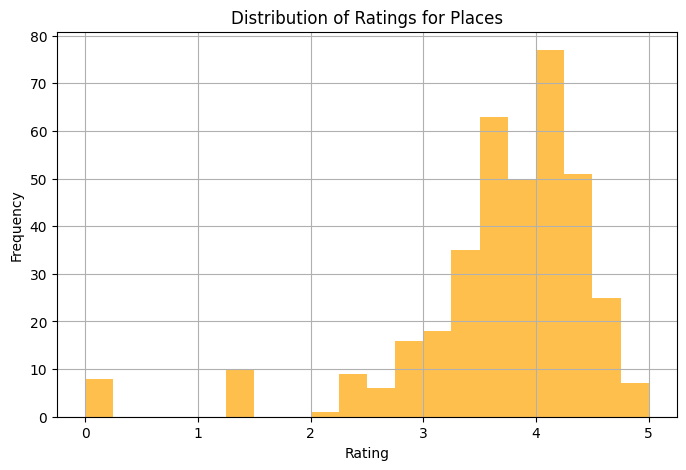

In [26]:
##Visualization 

# Filter rows with numeric ratings only
df = df_cleaned[df_cleaned['Rating_y'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Convert ratings to float for visualization
df['Rating_y'] = df['Rating_y'].astype(float)

# Plot ratings histogram To look at distribution of ratings across places and their counts
plt.figure(figsize=(8, 5))
plt.hist(df['Rating_y'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Ratings for Places')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()


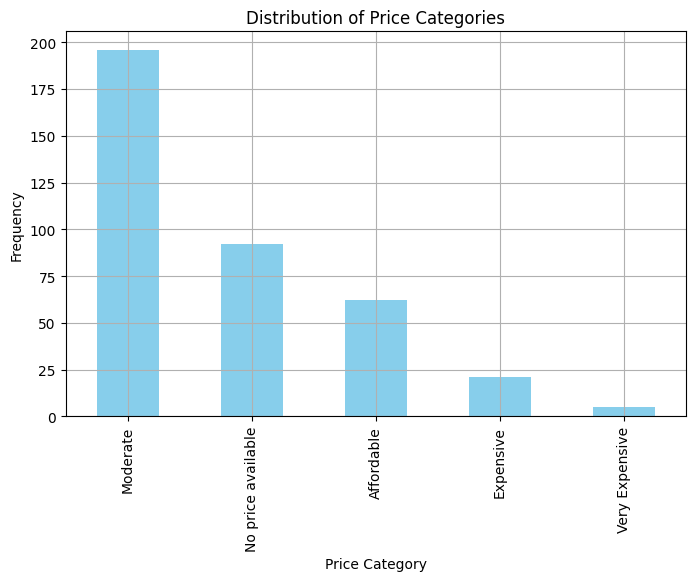

In [109]:
    
# Bar plot for price distribution
df_cleaned['Price_y'].value_counts(ascending=False).plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Relationship between Rating and Price')

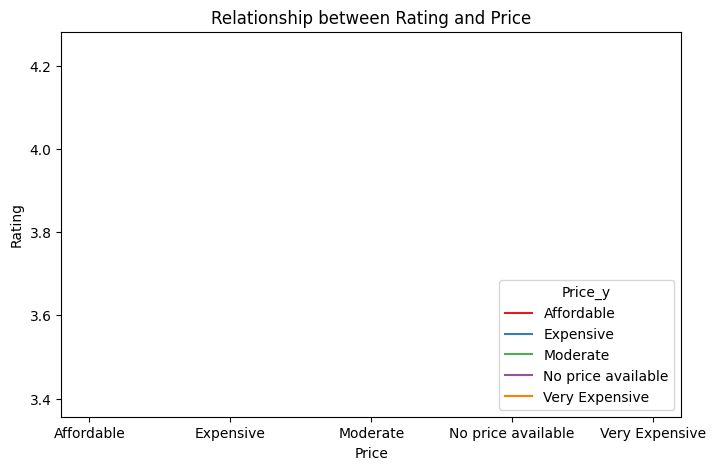

In [ ]:
#Scatterplot to compare ratings and price

# Create a scatter plot
plt.figure(figsize=(8, 5))

# Scatter plot
sns.lineplot(x="Price_y", y=df_cleaned['Rating_y'].mean(), data=df_cleaned, hue="Price_y", palette="Set1")

# Add labels and title
plt.ylabel("Rating")
plt.xlabel("Price") 
plt.title("Relationship between Rating and Price")

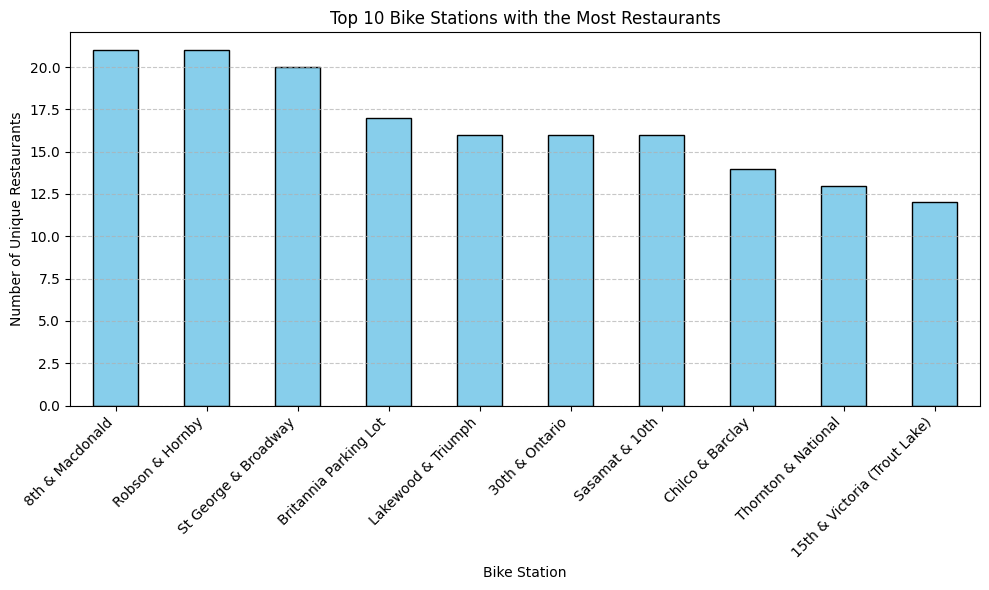

In [ ]:
# Count the number of restaurants (unique places) around each bike station
bike_station_restaurant_counts = df_cleaned.groupby('Bike Station')['Place'].nunique().sort_values(ascending=False)

# Get the top 10 bike stations with the most restaurants
top_10_bike_stations = bike_station_restaurant_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_bike_stations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Bike Stations with the Most Restaurants')
plt.xlabel('Bike Station')
plt.ylabel('Number of Unique Restaurants')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\863646096.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bike Station", y="free_bikes", data=df_sample, palette="Blues_d")


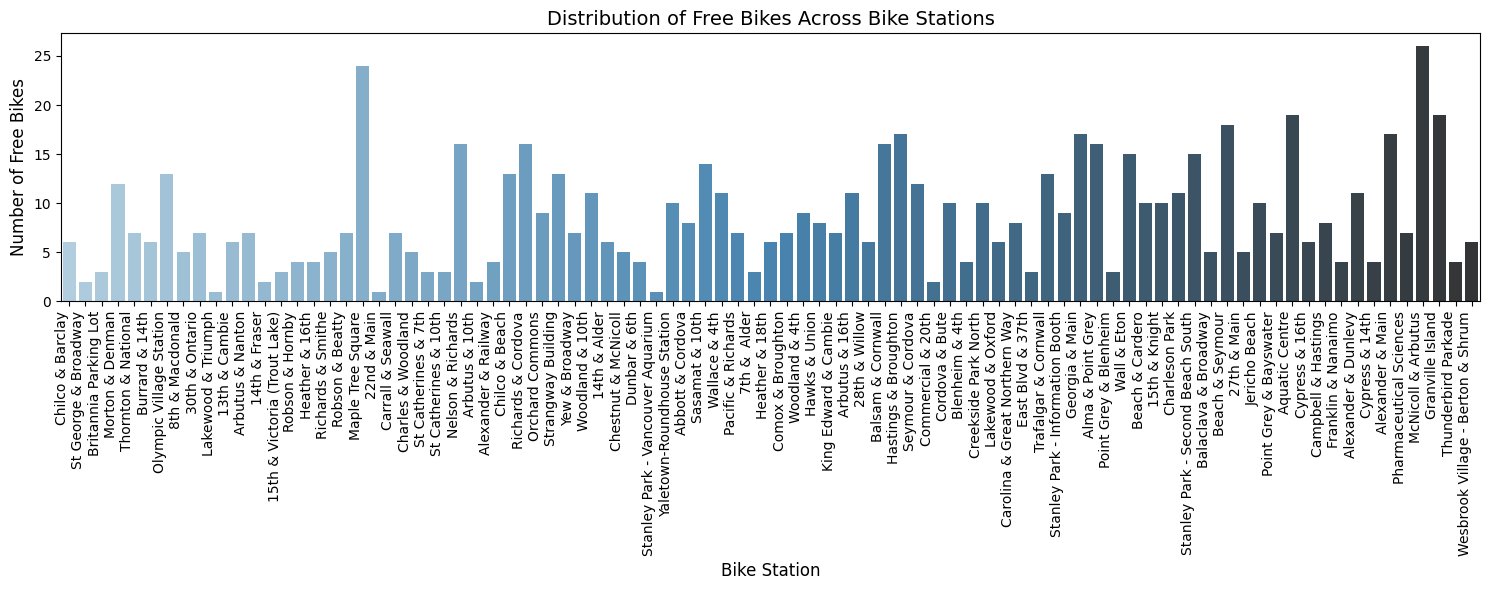

C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\863646096.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bike Station", y="empty_slots", data=df_sample, palette="Greens_d")


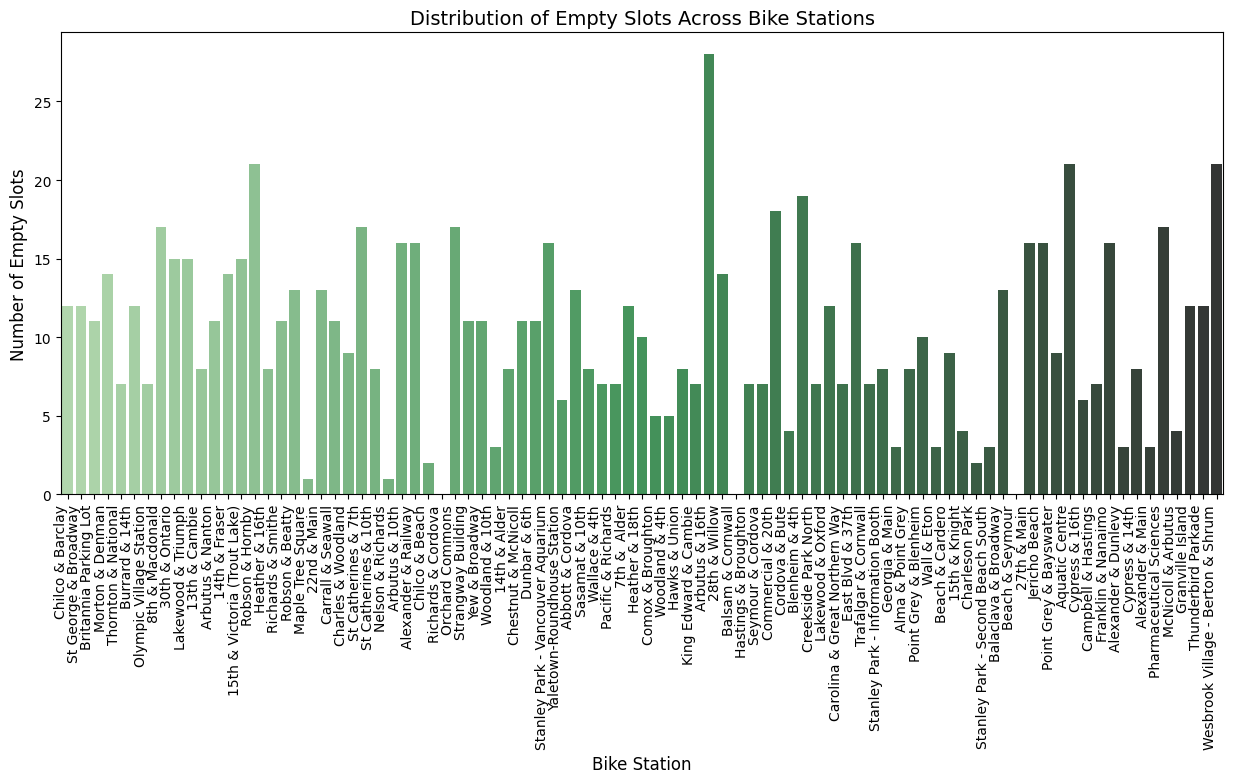

C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\863646096.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Bike Station", y="Rating_y", data=filtered_ratings, ci=None, palette="Reds_d")
C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\863646096.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bike Station", y="Rating_y", data=filtered_ratings, ci=None, palette="Reds_d")


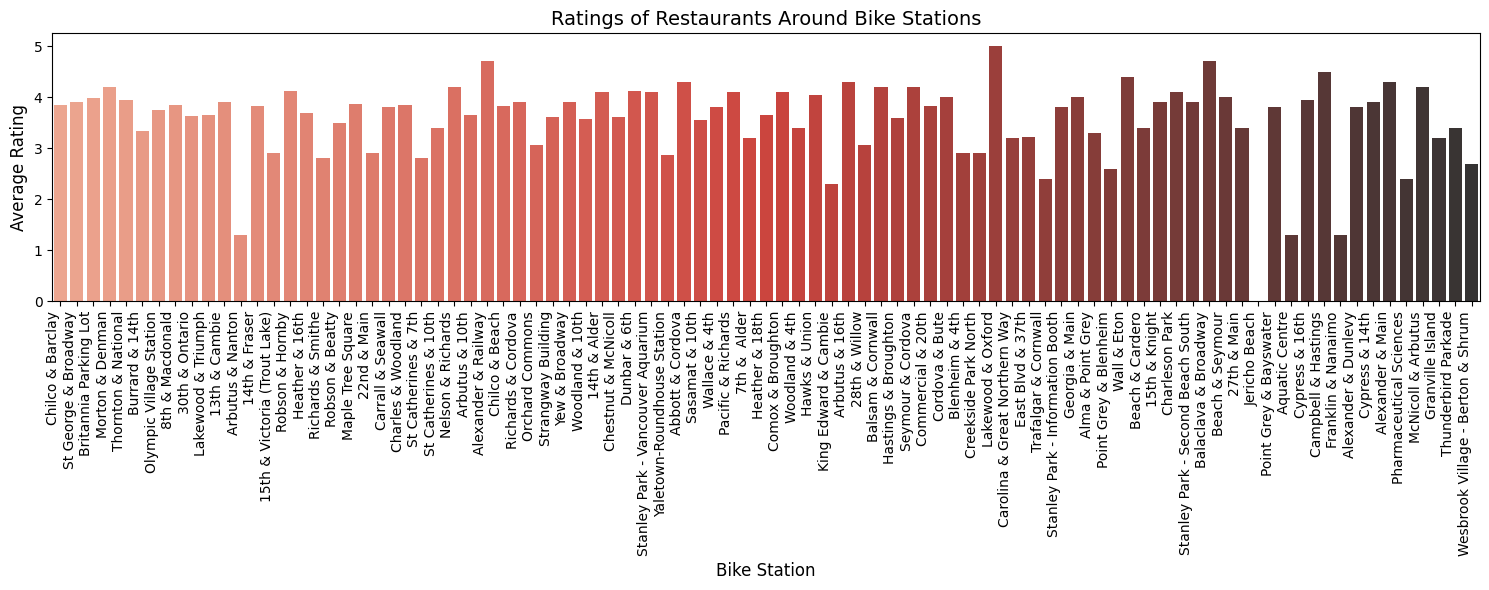

C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\863646096.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bike Station", y="total_bikes", data=df_sample, palette="Purples_d")


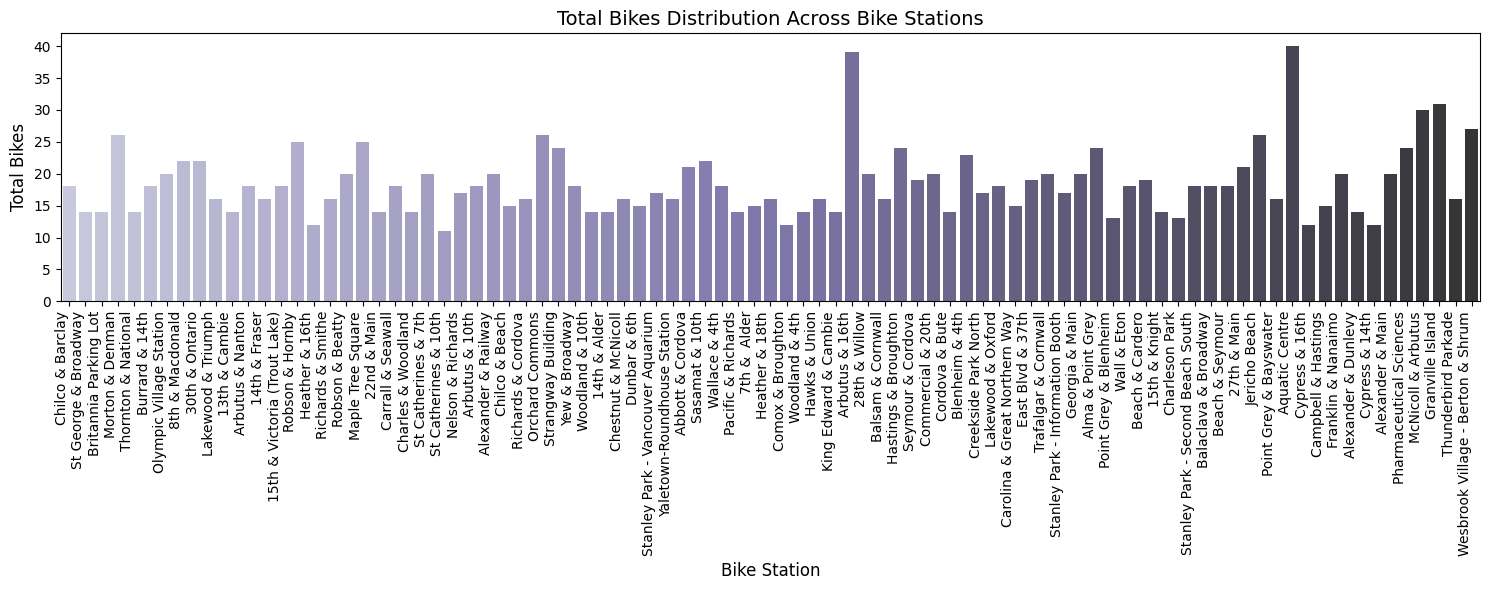

C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\863646096.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bike Station", y="Review Count", data=filtered_reviews, palette="Oranges_d")


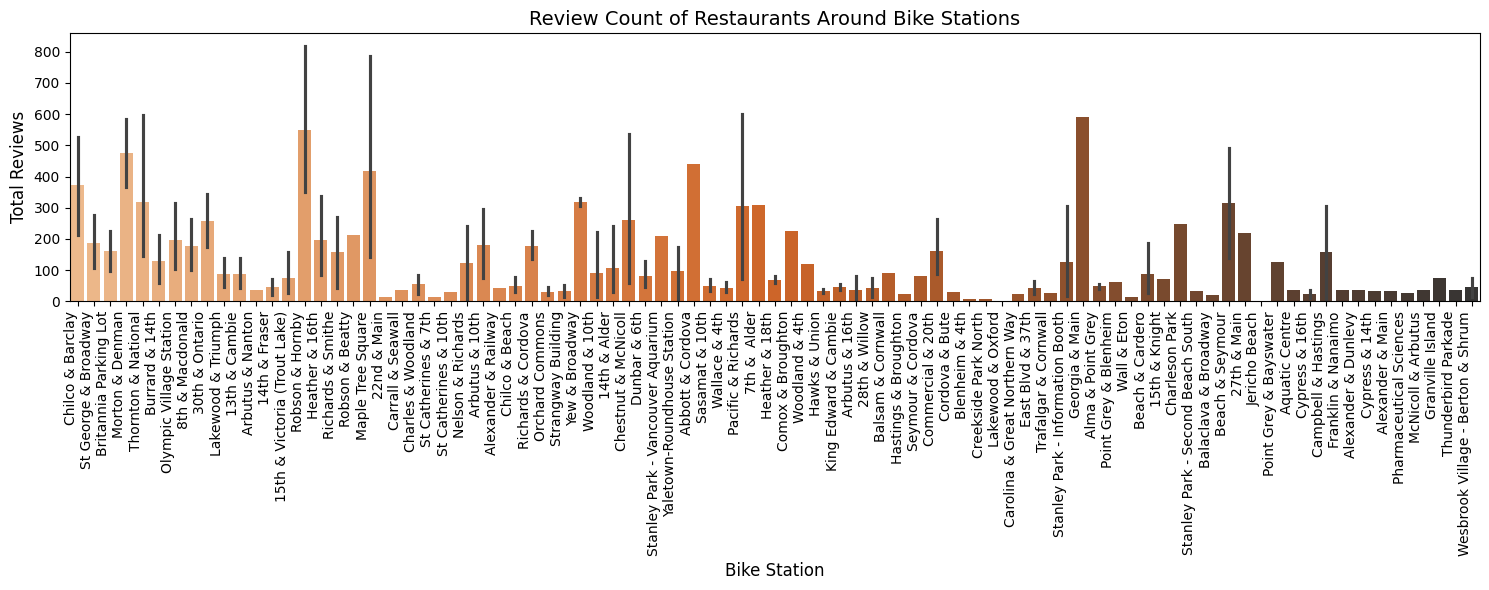

In [120]:
df_sample = pd.DataFrame(df_cleaned)



# Visualization 1: Distribution of free bikes across bike stations

plt.figure(figsize=(15, 6))

sns.barplot(x="Bike Station", y="free_bikes", data=df_sample, palette="Blues_d")

plt.title("Distribution of Free Bikes Across Bike Stations", fontsize=14)

plt.xlabel("Bike Station", fontsize=12)

plt.ylabel("Number of Free Bikes", fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()



# Visualization 2: Distribution of empty slots across bike stations

plt.figure(figsize=(15, 6))

sns.barplot(x="Bike Station", y="empty_slots", data=df_sample, palette="Greens_d")

plt.title("Distribution of Empty Slots Across Bike Stations", fontsize=14)

plt.xlabel("Bike Station", fontsize=12)

plt.ylabel("Number of Empty Slots", fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.show()



# Visualization 3: Ratings of restaurants around bike stations (ignoring "No rating available")

filtered_ratings = df_sample[df_sample["Rating_y"] != "No rating available"]

plt.figure(figsize=(15, 6))

sns.barplot(x="Bike Station", y="Rating_y", data=filtered_ratings, ci=None, palette="Reds_d")

plt.title("Ratings of Restaurants Around Bike Stations", fontsize=14)

plt.xlabel("Bike Station", fontsize=12)

plt.ylabel("Average Rating", fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()



# Visualization 4: Total bikes distribution across bike stations

plt.figure(figsize=(15, 6))

sns.barplot(x="Bike Station", y="total_bikes", data=df_sample, palette="Purples_d")

plt.title("Total Bikes Distribution Across Bike Stations", fontsize=14)

plt.xlabel("Bike Station", fontsize=12)

plt.ylabel("Total Bikes", fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()



# Visualization 5: Review count of restaurants (ignoring NaN values)

filtered_reviews = df_sample.dropna(subset=["Review Count"])

plt.figure(figsize=(15, 6))

sns.barplot(x="Bike Station", y="Review Count", data=filtered_reviews, palette="Oranges_d")

plt.title("Review Count of Restaurants Around Bike Stations", fontsize=14)

plt.xlabel("Bike Station", fontsize=12)

plt.ylabel("Total Reviews", fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()

C:\Users\lai29\AppData\Local\Temp\ipykernel_3164\4273081731.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y="Distance (meters)", x="Rating_y", data=df_cleaned, ci=None, palette="Blues_d")
C:\Users\lai29\AppData\Local\Temp\ipykernel_3164\4273081731.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(y="Distance (meters)", x="Rating_y", data=df_cleaned, ci=None, palette="Blues_d")


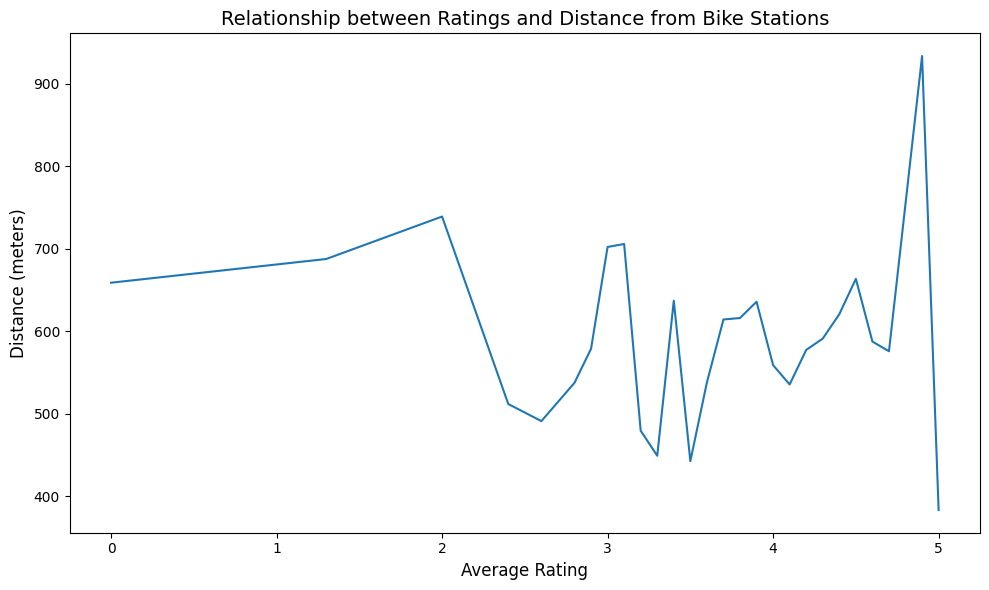

In [133]:
#Linegraph that shows relationship between ratings and distance from bike stations 


plt.figure(figsize=(10, 6))
sns.lineplot(y="Distance (meters)", x="Rating_y", data=df_cleaned, ci=None, palette="Blues_d")
plt.title("Relationship between Ratings and Distance from Bike Stations", fontsize=14)
plt.ylabel("Distance (meters)", fontsize=12)
plt.xlabel("Average Rating", fontsize=12)
plt.tight_layout()
plt.show()

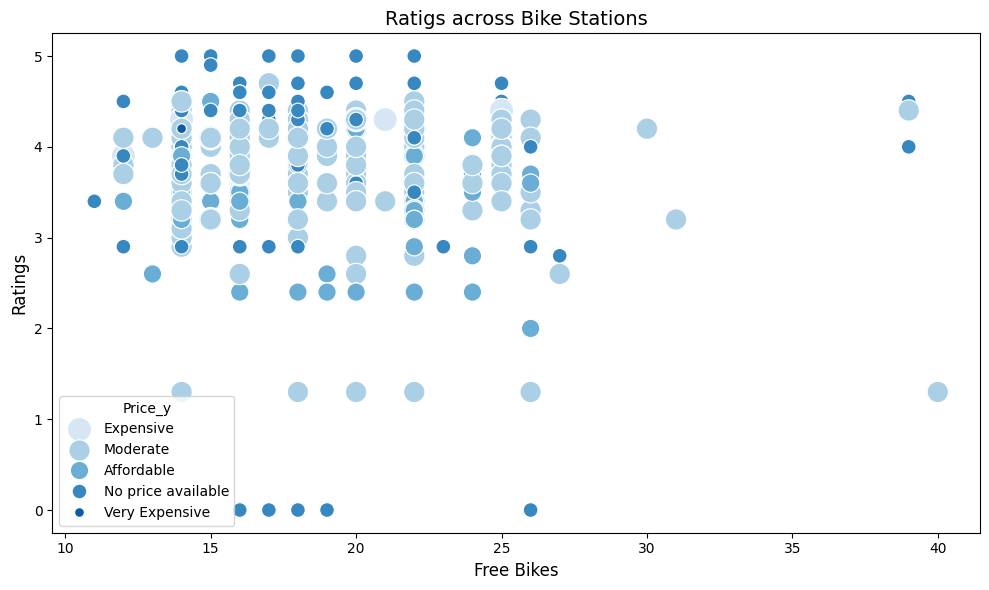

In [127]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="total_bikes",
    y="Rating_y",
    size="Price_y",
    hue="Price_y",
    sizes=(50, 300),
    palette="Blues",
    data=df_sample
)

plt.title("Ratigs across Bike Stations", fontsize=14)
plt.xlabel("Free Bikes", fontsize=12)
plt.ylabel("Ratings", fontsize=12)
plt.tight_layout()
plt.show()

In [126]:
# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth specified by their latitude and longitude.
    """
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
##Github code to calculate distance between longitude and latitude

# Calculate distance and add as a new column
df_cleaned["Distance (meters)"] = haversine(
    df_cleaned["Bike Station Latitude"],
    df_cleaned["Bike Station Longitude"],
    df_cleaned["Place Latitude_x"].astype(float, errors="ignore"),
    df_cleaned["Place Longitude_x"].astype(float, errors="ignore")
)

# Display the updated DataFrame with the new column
df_cleaned.head()

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance (meters)
1,Chilco & Barclay,Tavola,49.291843,-123.135761,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,Expensive,49.291909,-123.140713,6,12,18,359.203855
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,Moderate,49.291909,-123.140713,6,12,18,299.295365
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,Moderate,49.291909,-123.140713,6,12,18,524.767031
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,Morton & Denman,49.288396,-123.139830,3.7,245.0,Moderate,49.291909,-123.140713,6,12,18,392.438024
102,Chilco & Barclay,Cactus Club Cafe,49.286660,-123.142780,Chilco & Barclay,49.286897,-123.142730,3.7,369.0,Moderate,49.291909,-123.140713,6,12,18,602.606658


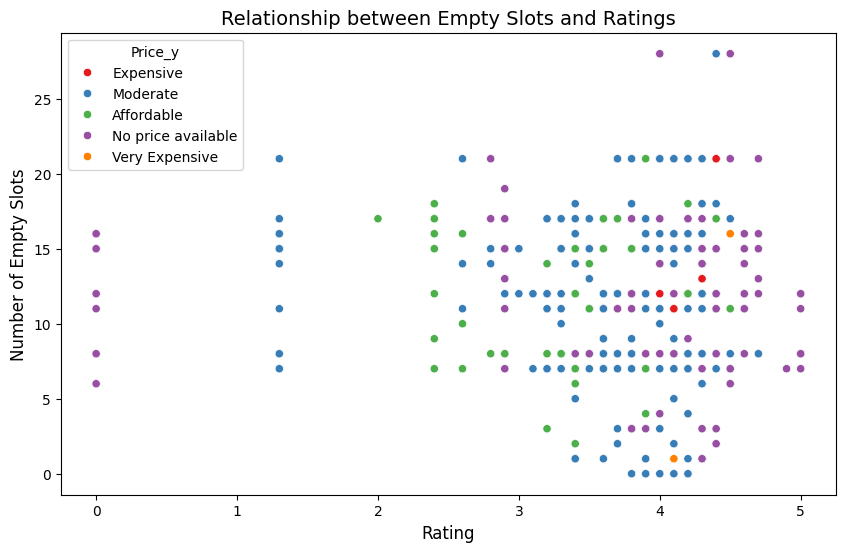

In [134]:
#Scatterplot between free bikes and places grouped by bike_station


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating_y", y="empty_slots", hue="Price_y", palette="Set1", data=df_cleaned)
plt.title("Relationship between Empty Slots and Ratings", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Empty Slots", fontsize=12)    
plt.show()

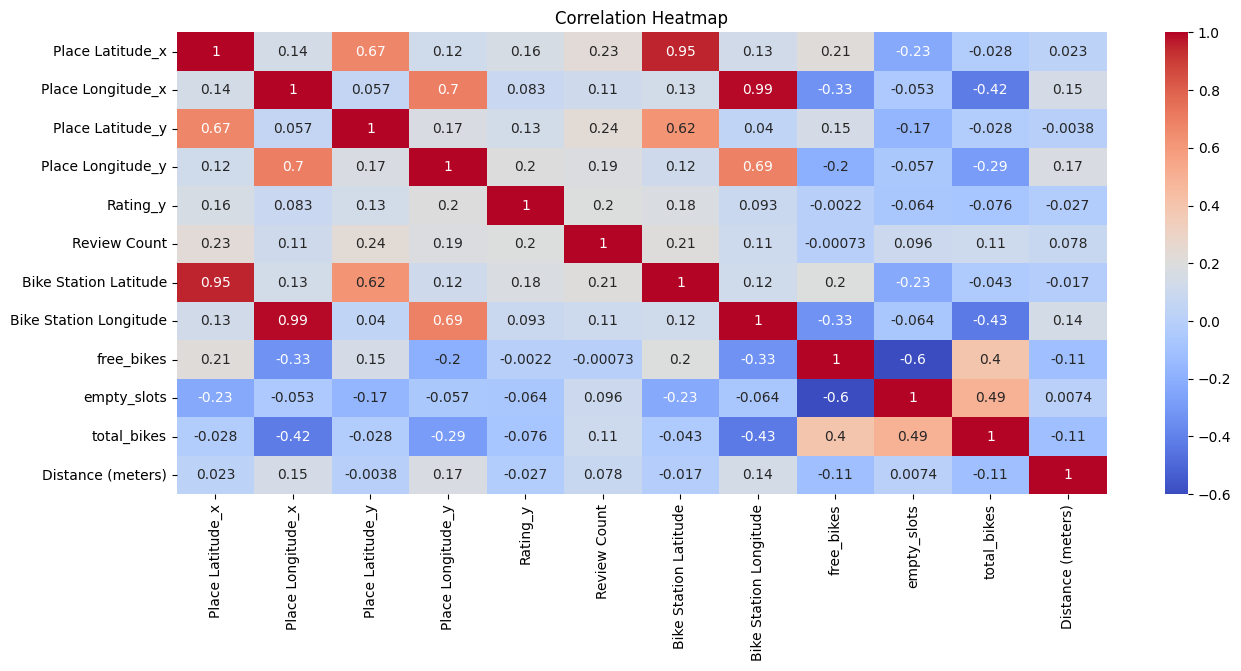

In [133]:
#Correlation heatmap: 
plt.figure(figsize=(15,6))
correlation = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

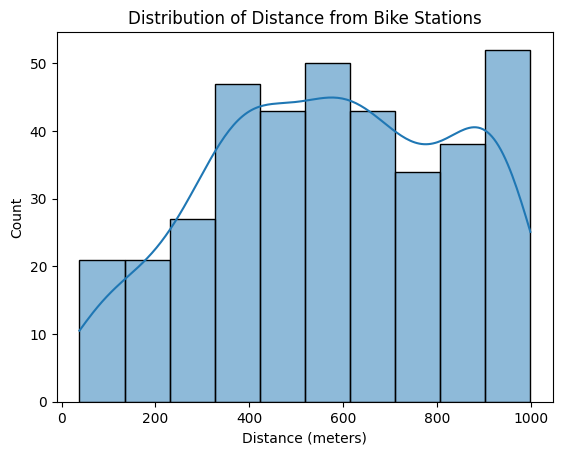

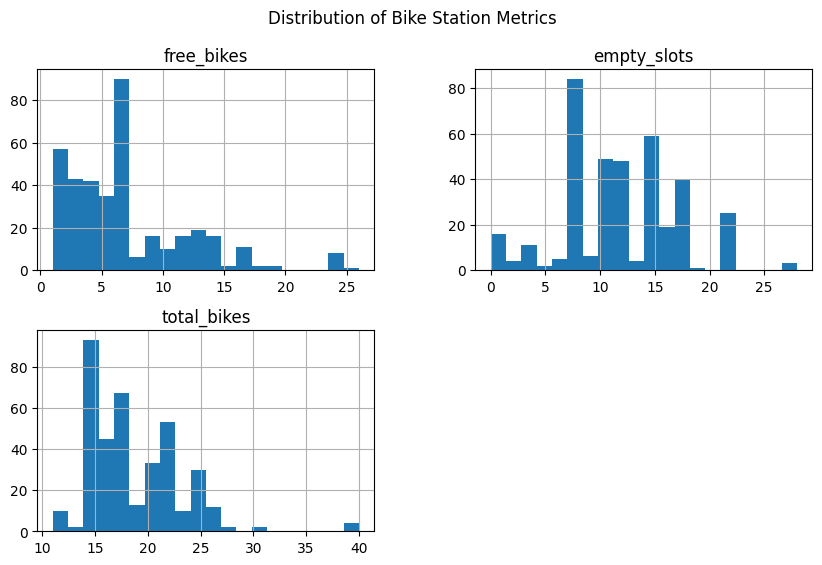

In [34]:
# Distribution of distance
sns.histplot(df_cleaned['Distance (meters)'], kde=True)
plt.title('Distribution of Distance from Bike Stations')
plt.show()

# Free bikes, empty slots, total bikes
df_cleaned[['free_bikes', 'empty_slots', 'total_bikes']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Bike Station Metrics')
plt.show()

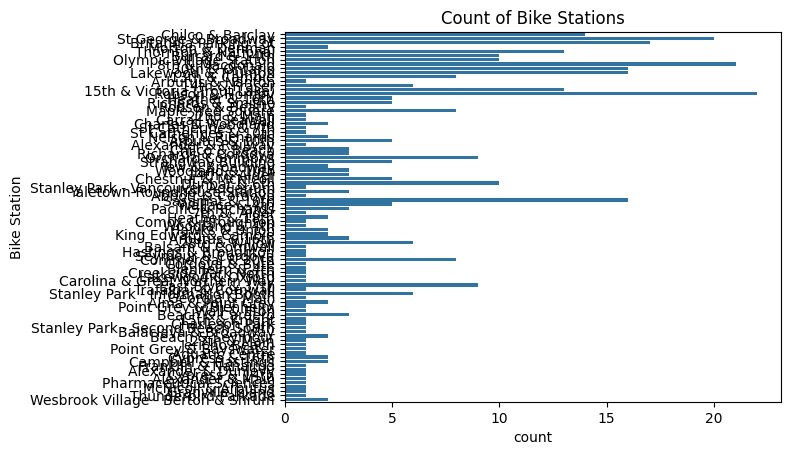

In [217]:
# Count of unique bike stations
sns.countplot(y=df_cleaned['Bike Station'])
plt.title('Count of Bike Stations')
plt.show()




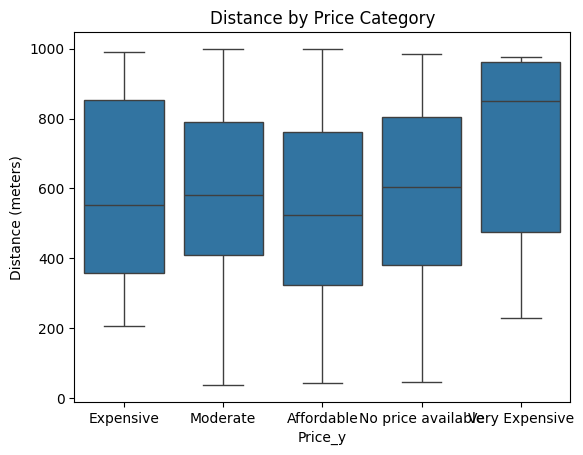

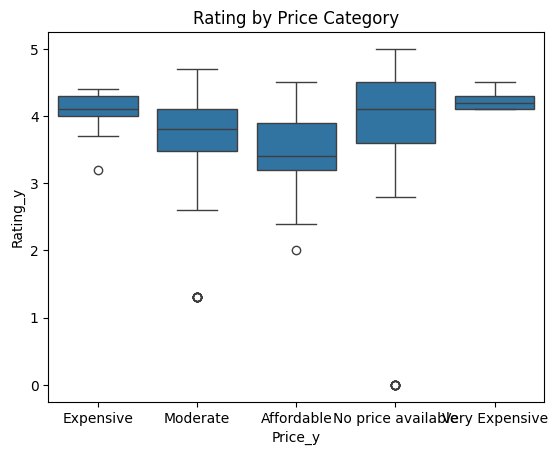

In [47]:
# Average distance by price category
sns.boxplot(data=df_cleaned, x='Price_y', y='Distance (meters)')
plt.title('Distance by Price Category')
plt.show()

# Rating distribution by price category
sns.boxplot(data=df_cleaned, x='Price_y', y='Rating_y')
plt.title('Rating by Price Category')
plt.show()


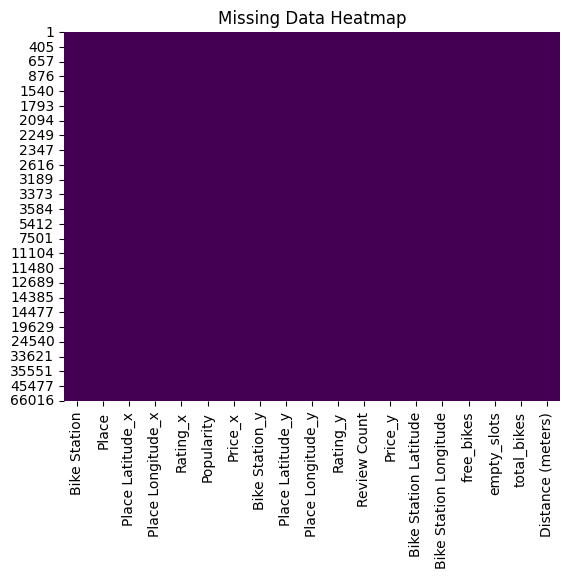

Series([], dtype: float64)


In [48]:
# Visualize missing data
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Focus on columns with significant missing data
missing = df_cleaned.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])  # Show only columns with missing data


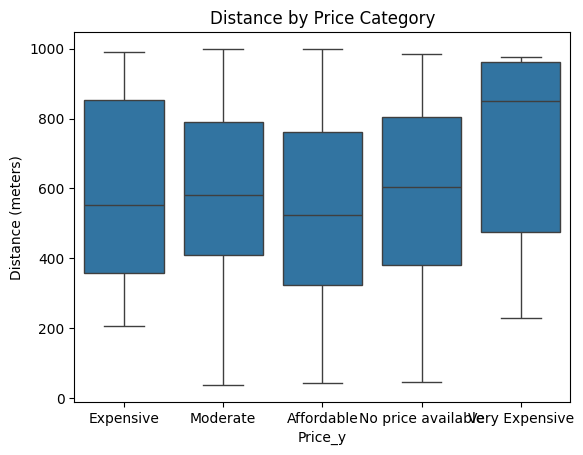

In [46]:
# Average distance by price category
sns.boxplot(data=df_cleaned, x='Price_y', y='Distance (meters)')
plt.title('Distance by Price Category')
plt.show()



In [44]:
data = df_cleaned.copy
data = data['Price_y']

,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance (meters)
1,Chilco & Barclay,Tavola,49.291843,-123.135761,No rating available,No popularity available,No price available,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,$$$,49.291909,-123.140713,6,12,18,359.203855
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,No rating available,No popularity available,No price available,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,$$,49.291909,-123.140713,6,12,18,299.295365
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,No rating available,No popularity available,No price available,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,$$,49.291909,-123.140713,6,12,18,524.767031
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,No rating available,No popularity available,No price available,Morton & Denman,49.288396,-123.139830,3.7,245.0,$$,49.291909,-123.140713,6,12,18,392.438024
102,Chilco & Barclay,Cactus Club Cafe,49.286660,-123.142780,No rating available,No popularity available,No price available,Chilco & Barclay,49.286897,-123.142730,3.7,369.0,$$,49.291909,-123.140713,6,12,18,602.606658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61416,McNicoll & Arbutus,RedBeef Noodle Kitchen,49.268330,-123.149078,No rating available,No popularity available,No price available,Thornton & National,49.279908,-123.099516,4.2,35.0,$$,49.276292,-123.150592,26,4,30,892.121929
62086,Granville Island,White Spot,49.276180,-123.128257,No rating available,No popularity available,No price available,8th & Macdonald,49.263818,-123.163287,3.2,75.0,$$,49.270290,-123.135025,19,12,31,818.559137
63128,Thunderbird Parkade,Blenz Coffee,49.253982,-123.235073,No rating available,No popularity available,No price available,Stanley Park - Third Beach Parking Lot,49.290066,-123.137835,3.4,36.0,$,49.261655,-123.241924,4,12,16,987.495398
66005,Wesbrook Village - Berton & Shrum,Chef Hung Taiwanese Beef Noodle,49.254439,-123.236248,No rating available,No popularity available,No price available,Orchard Commons,49.254528,-123.236094,2.6,76.0,$$,49.254780,-123.236210,6,21,27,38.017636


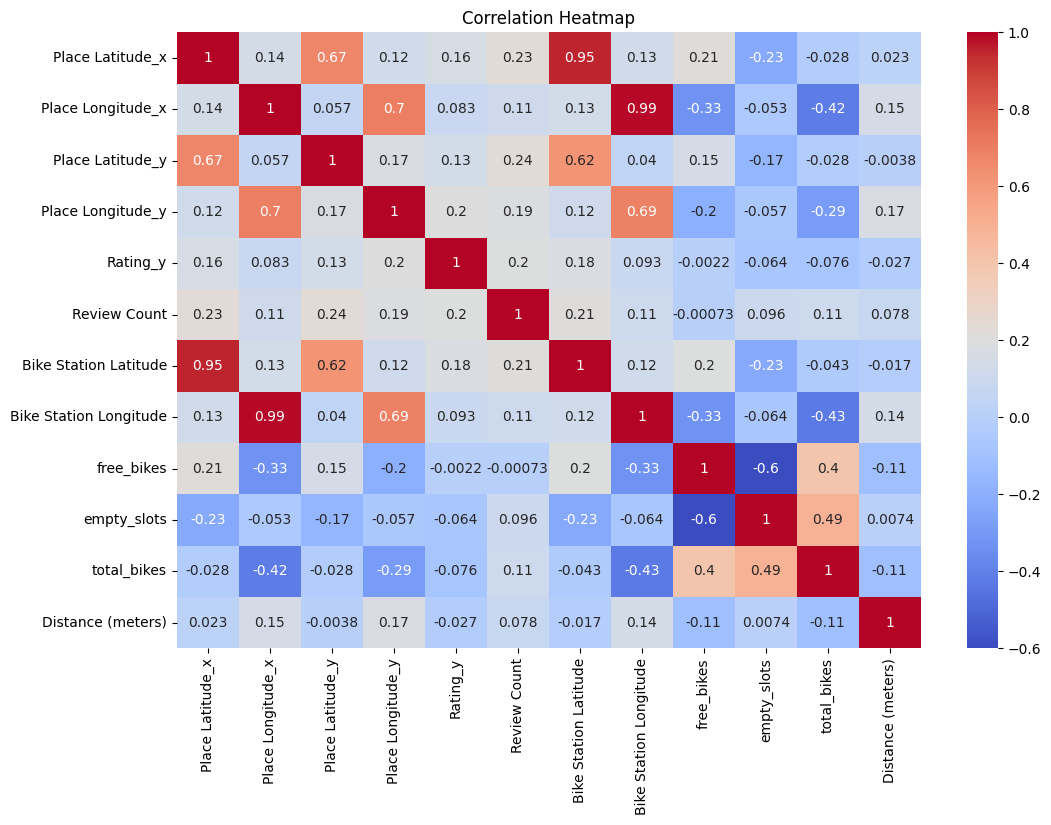

In [61]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

correlation = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


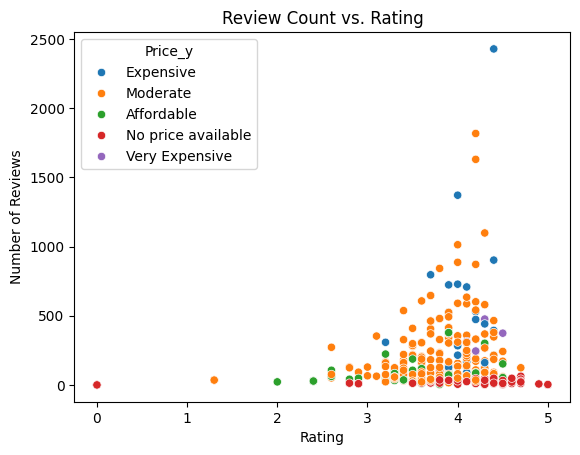

In [60]:
sns.scatterplot(data=df_cleaned, x='Rating_y', y='Review Count', hue='Price_y')
plt.title('Review Count vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


In [156]:
df_regression = df_cleaned.dropna(subset=['free_bikes', 'Distance (meters)', 'Rating_y', 'Price_y'])

# Independent and dependent variables for Model 1
X1 = df_regression[['Distance (meters)', 'total_bikes', 'Rating_y']]
y1 = df_regression['free_bikes']

# Independent and dependent variables for Model 2
X2 = df_regression[['Rating_y', 'free_bikes', 'empty_slots']]
y2 = df_regression['Distance (meters)']

# Add constant to predictors for OLS models
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

# Model 1: Free bikes
model1 = sm.OLS(y1, X1).fit()

# Model 2: Distance
model2 = sm.OLS(y2, X2).fit()

# Summary of Model 1
print("Regression Model 1: Predicting Free Bikes")
print(model1.summary())

# Summary of Model 2
print("Regression Model 2: Predicting Distance")
print(model2.summary())

Regression Model 1: Predicting Free Bikes
                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     24.33
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.13e-14
Time:                        12:49:45   Log-Likelihood:                -1098.1
No. Observations:                 376   AIC:                             2204.
Df Residuals:                     372   BIC:                             2220.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [184]:
import statsmodels.formula.api as smf
data = df_cleaned.copy()
data.rename(columns= {'Review Count':'review_count', 'Distance (meters)':'Distance'}, inplace=True)
data



,Bike Station,Place,Place Latitude_x,Place Longitude_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,review_count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,Distance
1,Chilco & Barclay,Tavola,49.291843,-123.135761,Chilco & Barclay,49.291816,-123.135719,4.4,394.0,3,49.291909,-123.140713,6,12,18,359.203855
33,Chilco & Barclay,Peaked Pies,49.289640,-123.138493,Chilco & Barclay,49.289649,-123.138480,4.4,215.0,2,49.291909,-123.140713,6,12,18,299.295365
56,Chilco & Barclay,Guu with Garlic,49.290278,-123.133923,Chilco & Barclay,49.290249,-123.133814,4.3,1098.0,2,49.291909,-123.140713,6,12,18,524.767031
96,Chilco & Barclay,Legendary Noodle House,49.288425,-123.139849,Morton & Denman,49.288396,-123.139830,3.7,245.0,2,49.291909,-123.140713,6,12,18,392.438024
102,Chilco & Barclay,Cactus Club Cafe,49.286660,-123.142780,Chilco & Barclay,49.286897,-123.142730,3.7,369.0,2,49.291909,-123.140713,6,12,18,602.606658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61416,McNicoll & Arbutus,RedBeef Noodle Kitchen,49.268330,-123.149078,Thornton & National,49.279908,-123.099516,4.2,35.0,2,49.276292,-123.150592,26,4,30,892.121929
62086,Granville Island,White Spot,49.276180,-123.128257,8th & Macdonald,49.263818,-123.163287,3.2,75.0,2,49.270290,-123.135025,19,12,31,818.559137
63128,Thunderbird Parkade,Blenz Coffee,49.253982,-123.235073,Stanley Park - Third Beach Parking Lot,49.290066,-123.137835,3.4,36.0,1,49.261655,-123.241924,4,12,16,987.495398
66005,Wesbrook Village - Berton & Shrum,Chef Hung Taiwanese Beef Noodle,49.254439,-123.236248,Orchard Commons,49.254528,-123.236094,2.6,76.0,2,49.254780,-123.236210,6,21,27,38.017636


In [136]:
x = data[data.columns[~data.columns.isin(['Price_y'])]]
y = data['Price_y']

In [85]:
data.dtypes

Bike Station               object
Place                      object
Place Latitude_x          float64
Place Longitude_x         float64
Rating_x                   object
Popularity                 object
Price_x                    object
Bike Station_y             object
Place Latitude_y          float64
Place Longitude_y         float64
Rating_y                  float64
review_count              float64
Price_y                    object
Bike Station Latitude     float64
Bike Station Longitude    float64
free_bikes                  int64
empty_slots                 int64
total_bikes                 int64
Distance                  float64
dtype: object

In [183]:
from sklearn.linear_model import LinearRegression

# Prepare the independent and dependent variables for Linear Regression
X = df_cleaned[['Rating_y']]  # Using Rating_x as the predictor
y = df_cleaned['empty_slots']  # Example continuous target (total_bikes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("R-squared:", model.score(X_test, y_test))


R-squared: -0.14779402715617862


Regression Analysis

In [232]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

regression_df = data[['Price_y','Rating_y','Distance','review_count','empty_slots','total_bikes']]
regression_df['Price_y'] = regression_df['Price_y'].astype(int)

C:\Users\lai29\AppData\Local\Temp\ipykernel_7920\2889362529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Price_y'] = regression_df['Price_y'].astype(int)


In [236]:
X = regression_df['review_count']
Y = regression_df['empty_slots']
X = sm.add_constant(X)

lin_reg = sm.OLS(Y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            empty_slots   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.484
Date:                Thu, 19 Dec 2024   Prob (F-statistic):             0.0628
Time:                        14:54:18   Log-Likelihood:                -1150.3
No. Observations:                 376   AIC:                             2305.
Df Residuals:                     374   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4619      0.321     35.715   

In [298]:
##Looking at dependent variable of Price. Backward regressions. Removing Highest P Values until the model is sufficent
y = regression_df['review_count']
X = regression_df.drop(columns=['review_count','empty_slots']) 

X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     32.66
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.45e-23
Time:                        18:10:06   Log-Likelihood:                -2563.0
No. Observations:                 376   AIC:                             5136.
Df Residuals:                     371   BIC:                             5156.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -367.0840     79.659     -4.608      

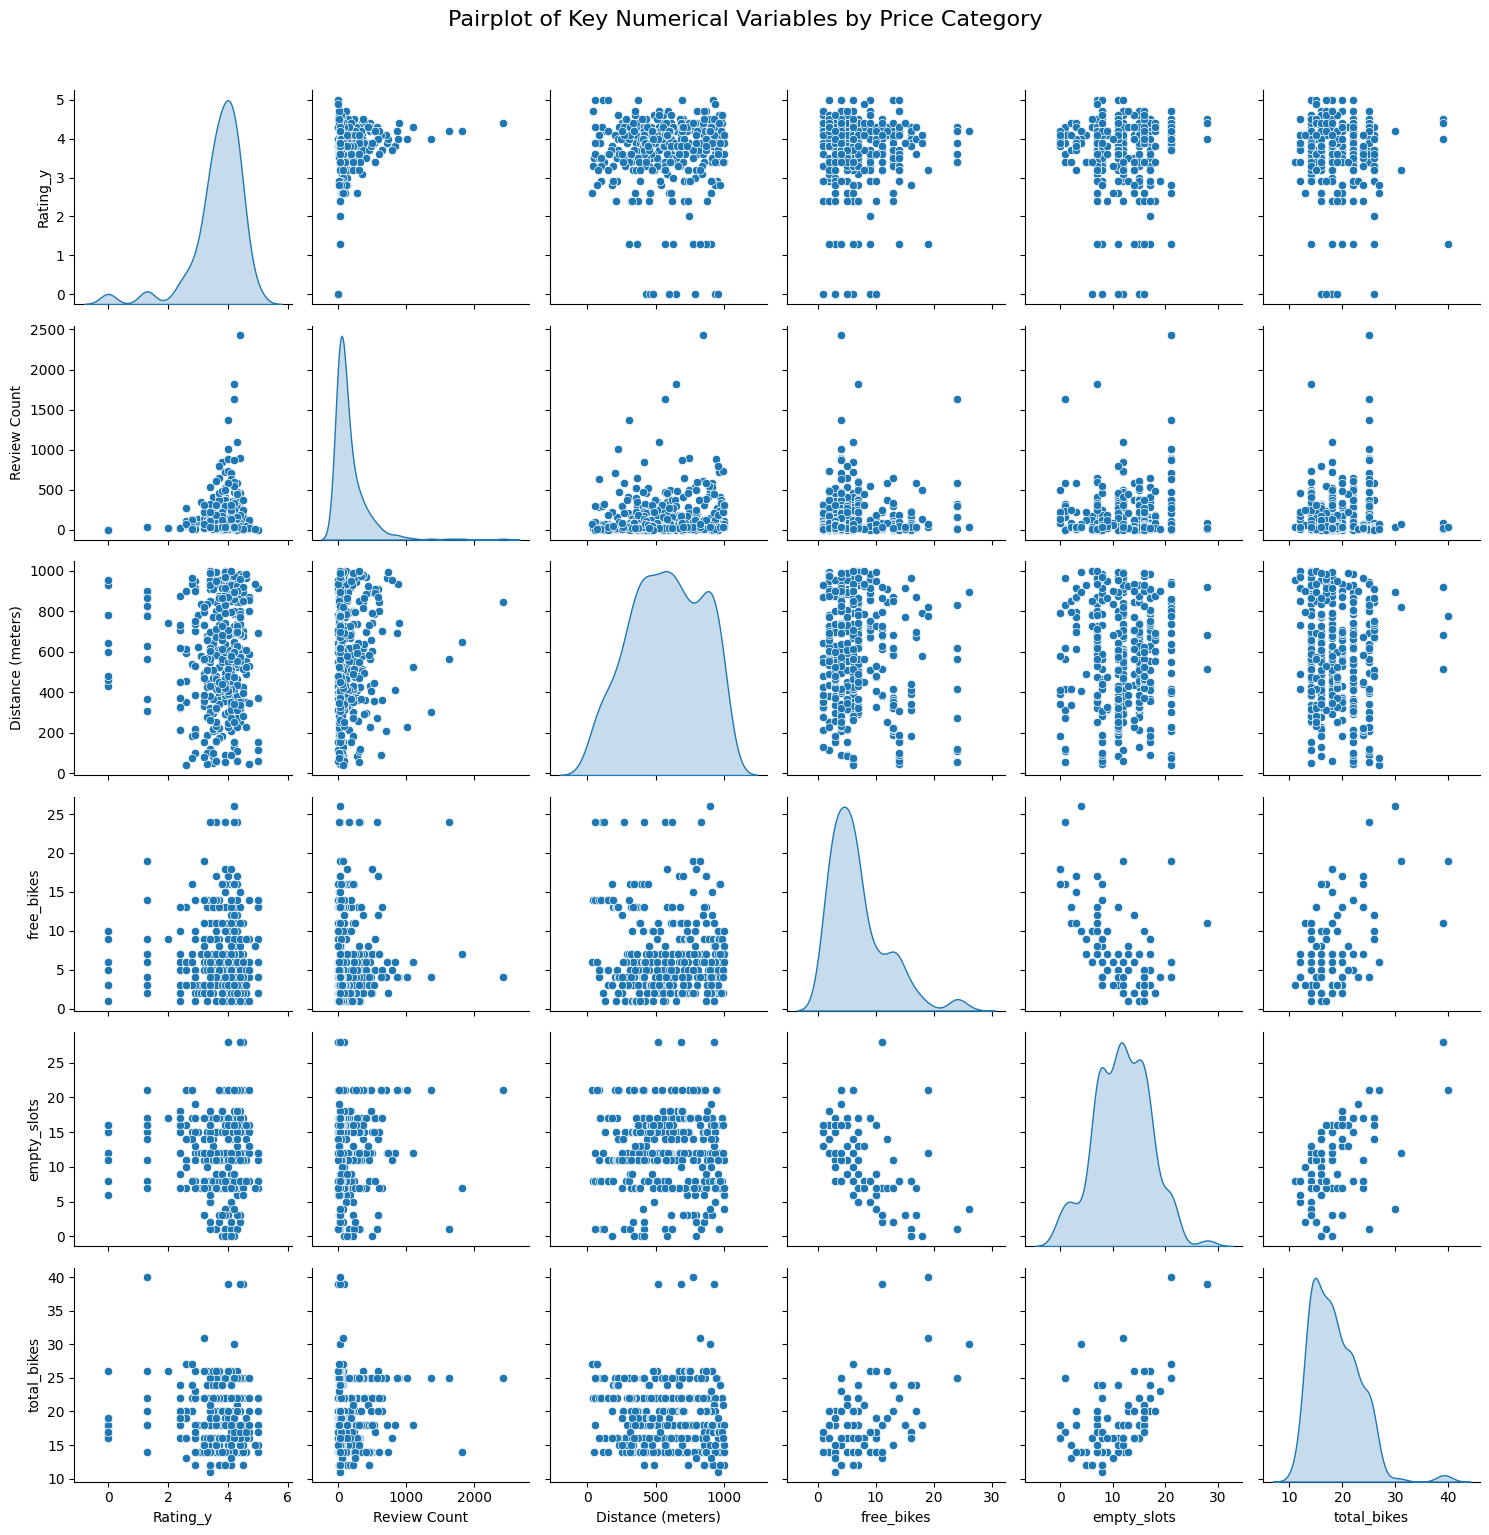